# Exploring the weights
- processes an `events[year][ch][sample]` object using `make_events_dict()`
- investigate e.g. PU weights

In [1]:
import glob
import os
import json
import pickle
import yaml

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import sys
sys.path
sys.path.append("../python/")

import utils

plt.rcParams.update({"font.size": 20})# Making stacked histograms
- processes an `events[year][ch][sample]` object using `make_events_dict()`
- uses `plot_hists()` to make stacked histograms

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
! ls ../eos/Apr12_presel_2017/

DYJetsToLL_M-10to50                     SingleElectron_Run2017E
DYJetsToLL_Pt-100To250                  SingleElectron_Run2017F
DYJetsToLL_Pt-250To400                  SingleMuon_Run2017B
DYJetsToLL_Pt-400To650                  SingleMuon_Run2017C
DYJetsToLL_Pt-50To100                   SingleMuon_Run2017D
DYJetsToLL_Pt-650ToInf                  SingleMuon_Run2017E
GluGluHToTauTau                         SingleMuon_Run2017F
GluGluHToWW_Pt-200ToInf_M-125           TTTo2L2Nu
GluGluZH_HToWW_ZTo2L_M-125              TTToHadronic
HWminusJ_HToWW_M-125                    TTToSemiLeptonic
HWplusJ_HToWW_M-125                     VBFHToWWToLNuQQ_M-125_withDipoleRecoil
HZJ_HToWW_M-125                         WJetsToLNu_HT-100To200
QCD_Pt_1000to1400                       WJetsToLNu_HT-1200To2500
QCD_Pt_1400to1800                       WJetsToLNu_HT-200To400
QCD_Pt_170to300                         WJetsToLNu_HT-2500ToInf
QCD_Pt_1800to2400                       WJetsToLNu_HT-400To600
QCD_Pt_2400to32

In [4]:
presel = {
    "mu": {
        ### part of the preselection
        "lep_fj_dr": "( ( lep_fj_dr>0.03) )",        
    },
    "ele": {
        ### part of the preselection
        "lep_fj_dr": "( ( lep_fj_dr>0.03) )",   
    }    
}

weights = {
    "ele": {
        "weight_L1Prefiring": 1,
        "weight_genweight": 1,
        "weight_id_electron": 1,
        "weight_pileup": 1,
        "weight_reco_electron": 1,
        "weight_trigger_electron": 1,
        "weight_vjets_nominal": 1,
    },
    "mu": {
        "weight_L1Prefiring": 1,
        "weight_genweight": 1,
        "weight_id_muon": 1,
        "weight_isolation_muon": 1,
        "weight_pileup": 1,
        "weight_trigger_iso_muon": 1,
        "weight_trigger_noniso_muon": 1,
        "weight_vjets_nominal": 1   ,
    },       
}

In [5]:
years = ["2017"] #, "2016", "2016APV", "2018"]
channels = ["mu", "ele"]

samples_dir = f"../eos/Apr12_presel_"

samples = [
    "HWW", 
    "VH",
    "VBF",
    "ttH",
    "QCD",
    "DYJets",
    "WJetsLNu",
    "WZQQ",
    "TTbar",
    "SingleTop",
    "Diboson",
    "Data"
]

In [6]:
from make_hists import make_events_dict
events_dict = make_events_dict(years, channels, samples_dir, samples, presel, weights, "all", add_inclusive_score=True,
#                                   apply_tagger=0.99,
#                                   apply_inverse_tagger=0.99,
                                 )

Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
---> Applying preselection.
applying lep_fj_dr selection on 37101 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon weight
Applying weight_pileup weight
Applying weight_trigger_iso_muon weight
Applying weight_trigger_noniso_muon weight
Applying weight_vjets_nominal weight
---> Done with accumulating event weights.
Will fill the WJetsLNu dataframe with the remaining 4443 events
tot event weight 7156.94114046186 

Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets
---> Applying preselection.
applying lep_fj_dr selection on 107935 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon weight
Applying

Finding ZJetsToQQ_HT-200to400 samples and should combine them under WZQQ
---> Applying preselection.
applying lep_fj_dr selection on 7 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon weight
Applying weight_pileup weight
Applying weight_trigger_iso_muon weight
Applying weight_trigger_noniso_muon weight
Applying weight_vjets_nominal weight
---> Done with accumulating event weights.
Will fill the WZQQ dataframe with the remaining 3 events
tot event weight 12.66880964237167 

Finding SingleElectron_Run2017E samples and should combine them under Data
Finding SingleElectron_Run2017B samples and should combine them under Data
Finding QCD_Pt_3200toInf samples and should combine them under QCD
---> Applying preselection.
applying lep_fj_dr selection on 97 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefi

ATTENTION: GluGluHToTauTau will be skipped
Finding ZJetsToQQ_HT-400to600 samples and should combine them under WZQQ
---> Applying preselection.
applying lep_fj_dr selection on 537 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon weight
Applying weight_pileup weight
Applying weight_trigger_iso_muon weight
Applying weight_trigger_noniso_muon weight
Applying weight_vjets_nominal weight
---> Done with accumulating event weights.
Will fill the WZQQ dataframe with the remaining 360 events
tot event weight 169.45087139335365 

Finding ZZ samples and should combine them under Diboson
---> Applying preselection.
applying lep_fj_dr selection on 1587 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon wei

Finding ttHToNonbb_M125 samples and should combine them under ttH
---> Applying preselection.
applying lep_fj_dr selection on 17182 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon weight
Applying weight_pileup weight
Applying weight_trigger_iso_muon weight
Applying weight_trigger_noniso_muon weight
weight_vjets_nominal weight is not stored in parquet
---> Done with accumulating event weights.
Will fill the ttH dataframe with the remaining 15629 events
tot event weight 52.85234523986145 

Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
---> Applying preselection.
applying lep_fj_dr selection on 1660 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_muon weight
Applying weight_isolation_muon weight
Applying wei

Will fill the WJetsLNu dataframe with the remaining 156248 events
tot event weight 8135.728116755879 

Finding TTToSemiLeptonic samples and should combine them under TTbar
---> Applying preselection.
applying lep_fj_dr selection on 1145640 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_electron weight
Applying weight_pileup weight
Applying weight_reco_electron weight
Applying weight_trigger_electron weight
weight_vjets_nominal weight is not stored in parquet
---> Done with accumulating event weights.
Will fill the TTbar dataframe with the remaining 869405 events
tot event weight 77870.254185871 

Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
---> Applying preselection.
applying lep_fj_dr selection on 2274030 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applyi

Finding WJetsToLNu_HT-70To100 samples and should combine them under WJetsLNu
---> Applying preselection.
applying lep_fj_dr selection on 795 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_electron weight
Applying weight_pileup weight
Applying weight_reco_electron weight
Applying weight_trigger_electron weight
Applying weight_vjets_nominal weight
---> Done with accumulating event weights.
Will fill the WJetsLNu dataframe with the remaining 166 events
tot event weight 281.73765174433413 

Finding SingleMuon_Run2017C samples and should combine them under Data
Finding ST_s-channel_4f_leptonDecays samples and should combine them under SingleTop
---> Applying preselection.
applying lep_fj_dr selection on 32260 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_electron weight
Apply

---> Applying preselection.
applying lep_fj_dr selection on 5193 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_electron weight
Applying weight_pileup weight
Applying weight_reco_electron weight
Applying weight_trigger_electron weight
weight_vjets_nominal weight is not stored in parquet
---> Done with accumulating event weights.
Will fill the QCD dataframe with the remaining 2412 events
tot event weight 737.5102663815097 

Finding QCD_Pt_300to470 samples and should combine them under QCD
---> Applying preselection.
applying lep_fj_dr selection on 3828 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_electron weight
Applying weight_pileup weight
Applying weight_reco_electron weight
Applying weight_trigger_electron weight
weight_vjets_nominal weight is not stored in parquet
-

---> Applying preselection.
applying lep_fj_dr selection on 35217 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_electron weight
Applying weight_pileup weight
Applying weight_reco_electron weight
Applying weight_trigger_electron weight
weight_vjets_nominal weight is not stored in parquet
---> Done with accumulating event weights.
Will fill the VH dataframe with the remaining 29342 events
tot event weight 16.28919238089734 

Finding WZ samples and should combine them under Diboson
---> Applying preselection.
applying lep_fj_dr selection on 7712 events
---> Done with preselection.
---> Accumulating event weights.
Applying weight_L1Prefiring weight
Applying weight_genweight weight
Applying weight_id_electron weight
Applying weight_pileup weight
Applying weight_reco_electron weight
Applying weight_trigger_electron weight
weight_vjets_nominal weight is not stored in parquet
---> Done

In [7]:
for key in events_dict["2017"]["ele"]["WJetsLNu"]:
    if "weight" in key:
        print(key)

weight
weight_genweight
weight_L1Prefiring
weight_pileup
weight_trigger_iso_muon
weight_trigger_noniso_muon
weight_isolation_muon
weight_id_muon
weight_id_electron
weight_reco_electron
weight_trigger_electron
weight_vjets_nominal
weight_d1K_NLO
weight_d2K_NLO
weight_d3K_NLO
weight_d1kappa_EW
weight_W_d2kappa_EW
weight_W_d3kappa_EW
event_weight


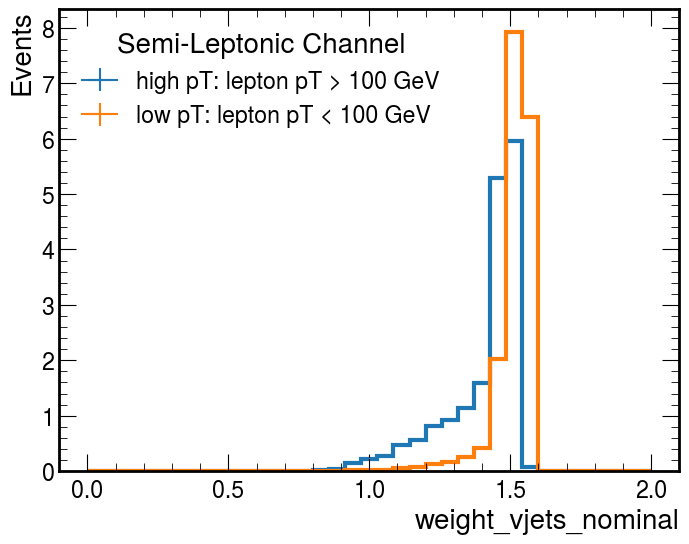

In [8]:
plt.rcParams.update({"font.size": 20})

h = hist2.Hist(
    hist2.axis.Regular(35, 0, 2, name="var", label=r"weight_vjets_nominal", overflow=True),
    hist2.axis.Boolean(name="pT")       
)


for ch in ["ele"]:
    df = events_dict["2017"][ch]["WJetsLNu"]
    
    high_pT = df["lep_pt"]>100
    low_pT = ~high_pT
    
    h.fill(
        var=df["weight_vjets_nominal"][high_pT],
        pT=1,
    )
    
    h.fill(
        var=df["weight_vjets_nominal"][low_pT],
        pT=0,
    )

fig, ax = plt.subplots(figsize=(8, 6))

hep.histplot(
    h[{"pT": 1}],
    ax=ax,
    label=r"high pT: lepton pT > 100 GeV",
    linewidth=3,
    density=True
)
hep.histplot(
    h[{"pT": 0}],
    ax=ax,
    label=r"low pT: lepton pT < 100 GeV",
    linewidth=3,
    density=True
)
     
ax.legend(title=f"Semi-Leptonic Channel")
ax.set_ylabel("Events");  

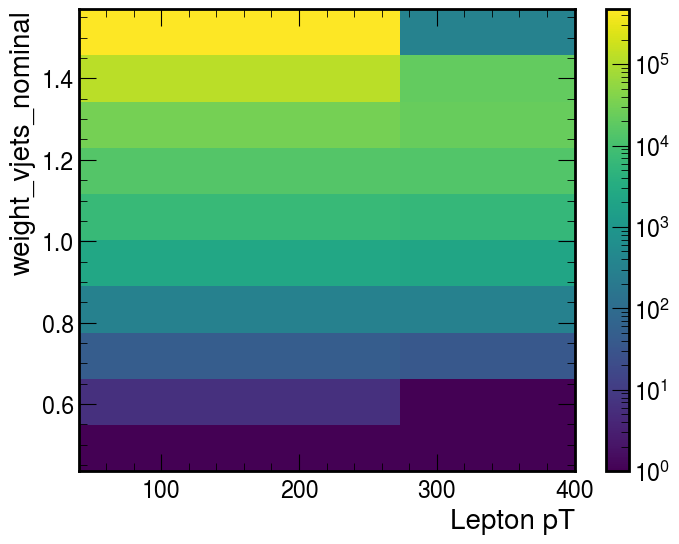

In [10]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist2d(
    events_dict["2017"][ch]["WJetsLNu"]["lep_pt"],
    events_dict["2017"][ch]["WJetsLNu"]["weight_vjets_nominal"],
    norm=LogNorm(),
    bins=[10,10]
      )
ax.set_xlim(40,400)
ax.set_xlabel("Lepton pT");
ax.set_ylabel("weight_vjets_nominal");
plt.colorbar()

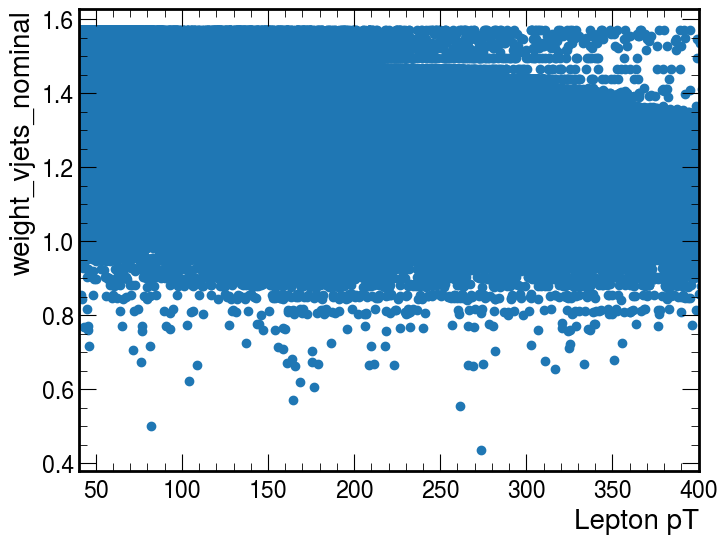

In [12]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(
    events_dict["2017"][ch]["WJetsLNu"]["lep_pt"],
    events_dict["2017"][ch]["WJetsLNu"]["weight_vjets_nominal"],
#     norm=LogNorm()
      )
ax.set_xlim(40,400)
ax.set_xlabel("Lepton pT");
ax.set_ylabel("weight_vjets_nominal");
# plt.colorbar()

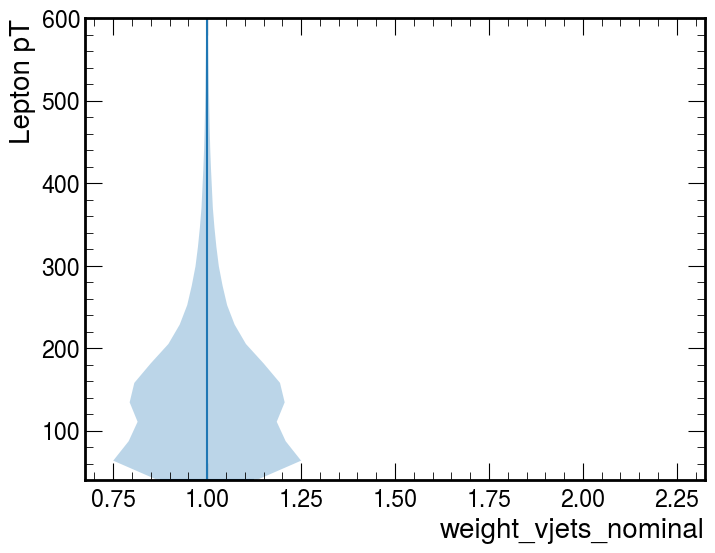

In [14]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(8, 6))
plt.violinplot([events_dict["2017"][ch]["WJetsLNu"]["lep_pt"],events_dict["2017"][ch]["WJetsLNu"]["weight_vjets_nominal"]]
              )
# ax.set_xlim(40,400)
ax.set_ylim(40,600)
ax.set_xlabel("weight_vjets_nominal");
ax.set_ylabel("Lepton pT");
# plt.colorbar()

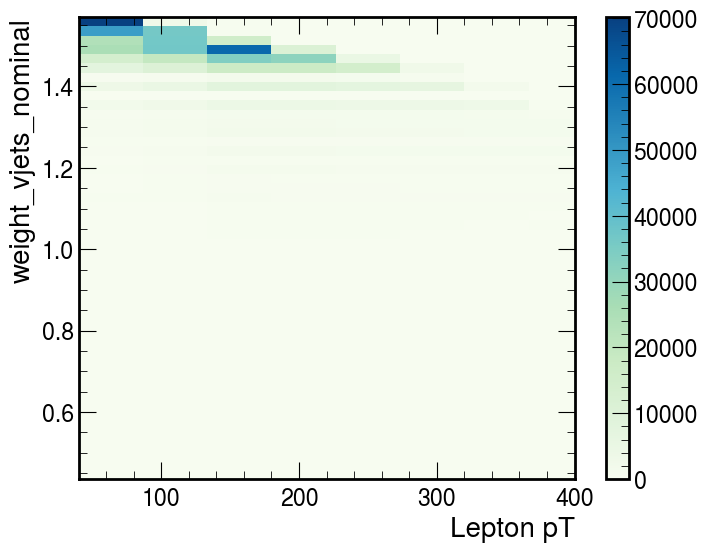

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Some random data

N = 10000
x = events_dict["2017"][ch]["WJetsLNu"]["lep_pt"]
y = events_dict["2017"][ch]["WJetsLNu"]["weight_vjets_nominal"]

fig, ax = plt.subplots(figsize=(8, 6))
plt.hist2d(x,y, 50, cmap='GnBu')

ax.set_xlim(40,400)
ax.set_xlabel("Lepton pT");
ax.set_ylabel("weight_vjets_nominal");

plt.colorbar()
plt.show()

In [16]:
def compute_profile(x, y, nbin=(100,100)):
    
    # use of the 2d hist by numpy to avoid plotting
    h, xe, ye = np.histogram2d(x,y,nbin)
    
    # bin width
    xbinw = xe[1]-xe[0]

    # getting the mean and RMS values of each vertical slice of the 2D distribution
    # also the x valuse should be recomputed because of the possibility of empty slices
    x_array      = []
    x_slice_mean = []
    x_slice_rms  = []
    for i in range(xe.size-1):
        yvals = y[ (x>xe[i]) & (x<=xe[i+1]) ]
        if yvals.size>0: # do not fill the quanties for empty slices
            x_array.append(xe[i]+ xbinw/2)
            x_slice_mean.append( yvals.mean())
            x_slice_rms.append( yvals.std())
    x_array = np.array(x_array)
    x_slice_mean = np.array(x_slice_mean)
    x_slice_rms = np.array(x_slice_rms)

    return x_array, x_slice_mean, x_slice_rms

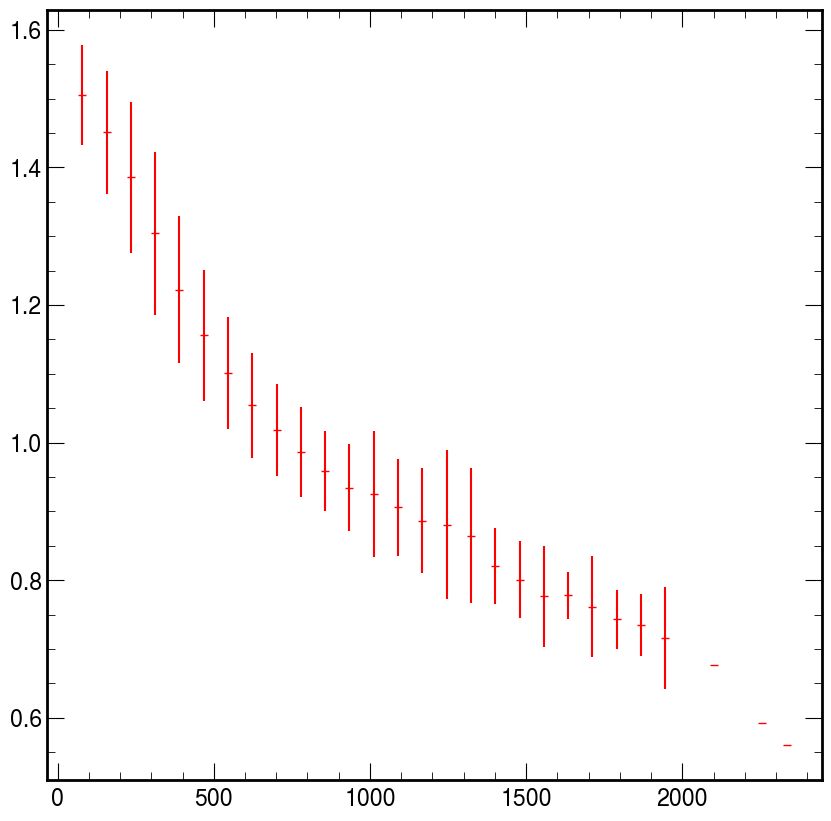

In [17]:
#compute the profile
p_x, p_mean, p_rms = compute_profile(x,y,(30,30))

plt.errorbar(p_x, p_mean, p_rms,fmt='_', ecolor='r', color='r')
plt.show()

# PU weights

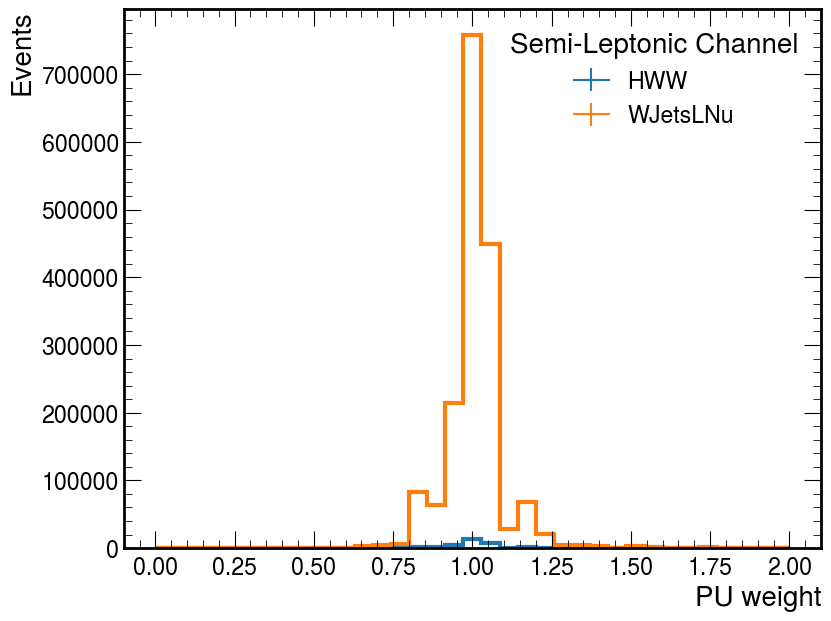

In [20]:
plt.rcParams.update({"font.size": 20})

samples_to_plot = ["HWW", "WJetsLNu"]

channels = ["mu", "ele"]
# channels = ["mu"]

fig, ax = plt.subplots(figsize=(9, 7))
for sample in samples_to_plot:
    
    h = hist2.Hist(
        hist2.axis.Regular(35, 0, 2, name="var", label=r"PU weight")#, overflow=True),
    )
    
    for ch in channels:
        
        df = events_dict["2017"][ch][sample]
        
        # remove strange PU
        strange_PU = df["weight_pileup"]>2
        df = df[~strange_PU]
        
        h.fill(
            var=df["weight_pileup"],
#             weight=events_dict[ch][sample]["event_weight"]
        )

    hep.histplot(
        h,
        ax=ax,
        label=f"{sample}",
        linewidth=3,
#         density=True
    )
# ax.set_yscale("log")
if len(channels)==2:
    ax.legend(title=f"Semi-Leptonic Channel")
else:
    ax.legend(title=f"{label_by_ch[ch]} Channel")
ax.set_ylabel("Events");